# Question 6

# 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankNote.csv', sep=',')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = pd.DataFrame(pca.fit_transform(df), columns=['Feature 1', 'Feature 2'])
X

,Feature 1,Feature 2
0,-8.128638,-2.390167
1,-7.811304,-2.712167
2,3.674734,-4.399368
3,-9.917815,-0.989089
4,6.942445,-0.772452
...,...,...
1367,-0.988750,-1.198333
1368,8.795215,0.528851
1369,21.734566,4.807556
1370,14.956474,3.804900


# 2

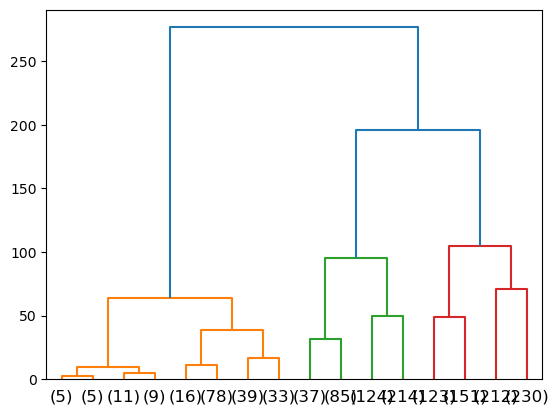

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X)
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix,p=3,truncate_mode='level')
plt.show()

# 3

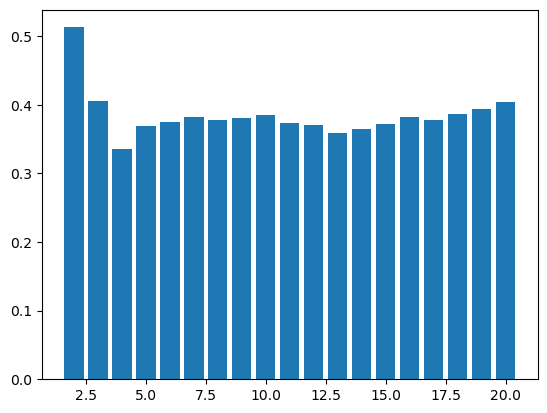

In [7]:
from sklearn.metrics import silhouette_score

cache = []
AggClus = []
for i in range(2, 21):
    temp = AgglomerativeClustering(n_clusters=i)
    label = temp.fit_predict(X)
    AggClus.append(temp)
    score = silhouette_score(X, labels = label)
    cache.append(score)

plt.bar(range(2, 21), cache)
plt.show()

As we can see in the above plot the best K is 2.

# 4

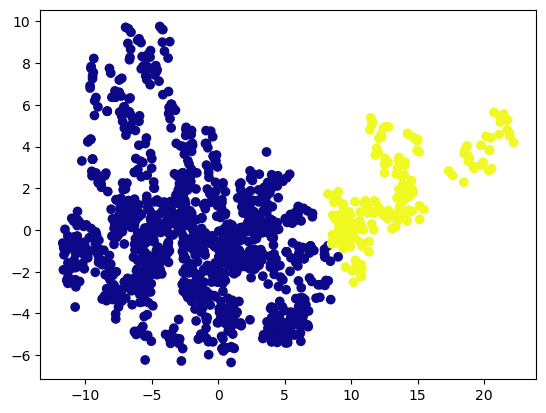

In [8]:
label = AggClus[0].fit_predict(X)

plt.scatter(X['Feature 1'], X['Feature 2'], c=label, cmap='plasma')

# 5

In [9]:
clusters = AggClus[0].labels_
cluster1 = X.loc[clusters==0]
print("For cluster 1 we have:\n",cluster1.describe())
cluster2 = X.loc[clusters==1]
print("For cluster 2 we have:\n",cluster2.describe())

For cluster 1 we have:
          Feature 1    Feature 2
count  1176.000000  1176.000000
mean     -2.140191    -0.258263
std       4.896093     3.133093
min     -11.695889    -6.347220
25%      -5.928805    -2.343014
50%      -2.291677    -0.626498
75%       1.453790     1.204141
max       9.021863     9.750897
For cluster 2 we have:
         Feature 1   Feature 2
count  196.000000  196.000000
mean    12.841145    1.549579
std      3.626954    1.916749
min      8.257116   -2.506183
25%      9.853303    0.173509
50%     11.985752    1.130049
75%     14.226114    3.120952
max     22.228621    5.642637


#### From previous part we see that cluster one have more data and have a mean of around -2 and a higher standard deviation from cluster 2. the mean of cluster two seems to be around 14 and as we can see in the output of previous cell the scatter plot and describe of the clusters are similar.

# 6

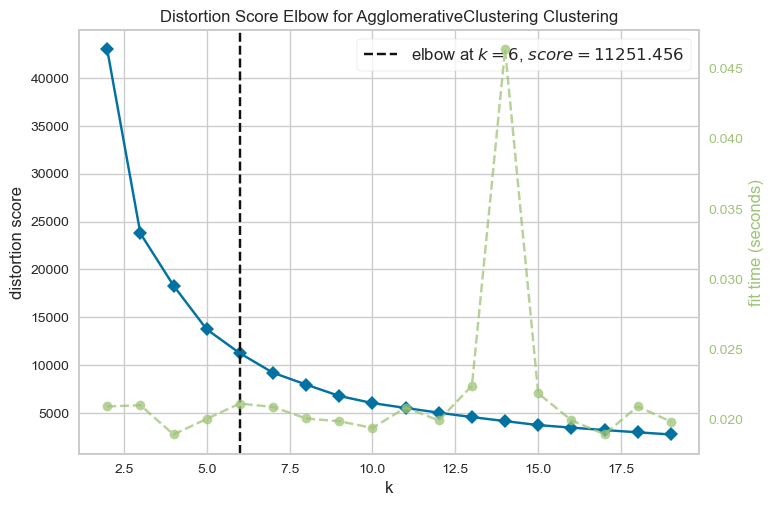

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

clusterer = AgglomerativeClustering()
visualizer = KElbowVisualizer(clusterer, k=(2, 20))
visualizer.fit(X)
visualizer.show()

#### As we can see in the figure the elbow occures at K=6

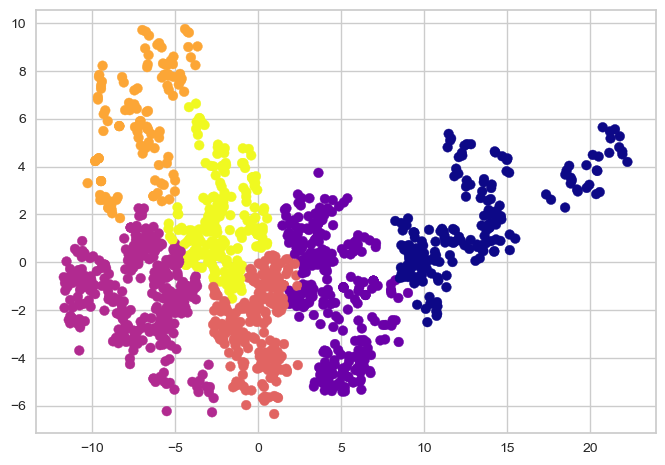

In [11]:
label =  AggClus[4].fit_predict(X)
plt.scatter(X['Feature 1'], X['Feature 2'], c=label, cmap='plasma')

# 7

c:\Users\mykar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mykar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

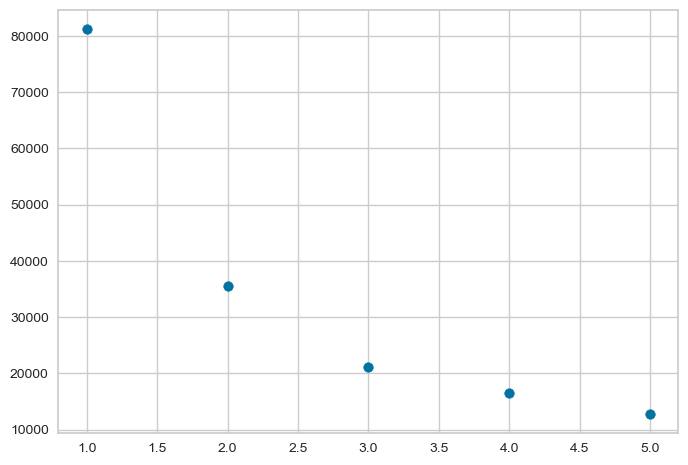

In [12]:
from sklearn.cluster import KMeans

score = []
for k in range(1, 6):
    kmean = KMeans(k)
    kmean.fit(X)
    score.append(kmean.inertia_)
plt.scatter(x=range(1,6), y=score)
plt.show()

# 8

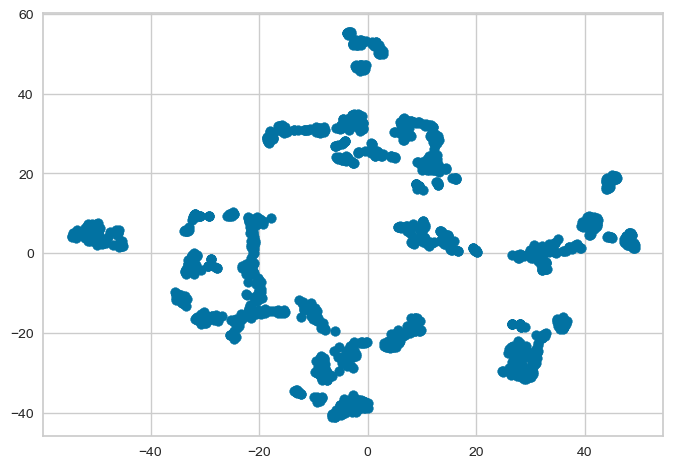

In [13]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2).fit_transform(df)
X = pd.DataFrame({'Feature 1': X[:,0], 'Feature 2': X[:,1]})
plt.scatter(x='Feature 1', y='Feature 2', data=X)

# 9

For eps = 0.1 we have:


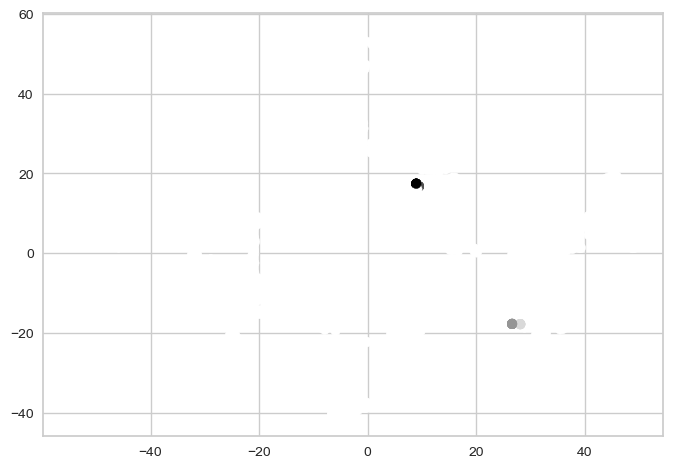

For eps = 0.5 we have:


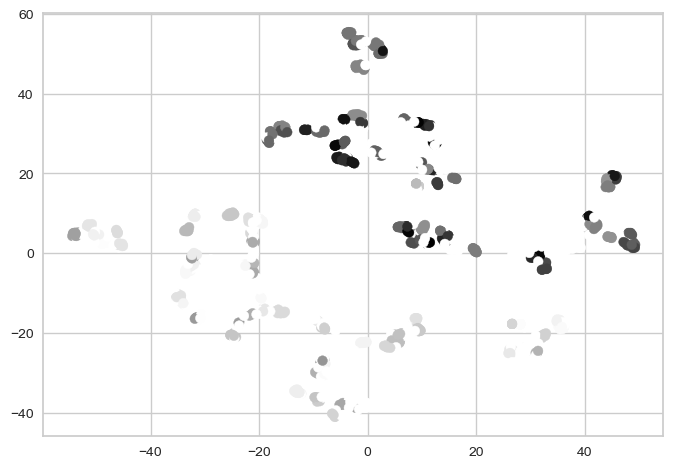

For eps = 1.0 we have:


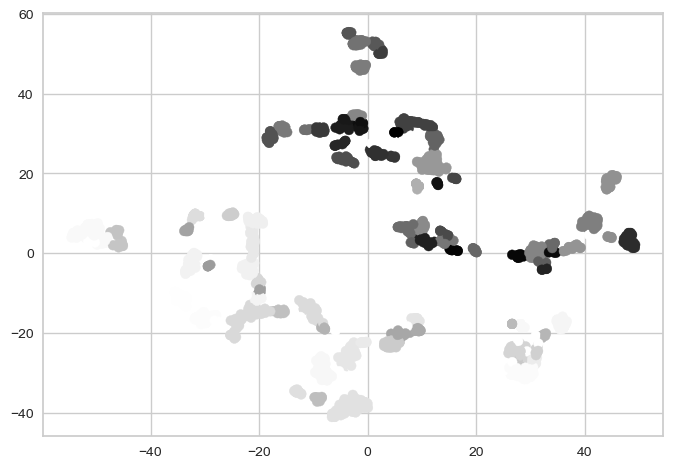

For eps = 1.5 we have:


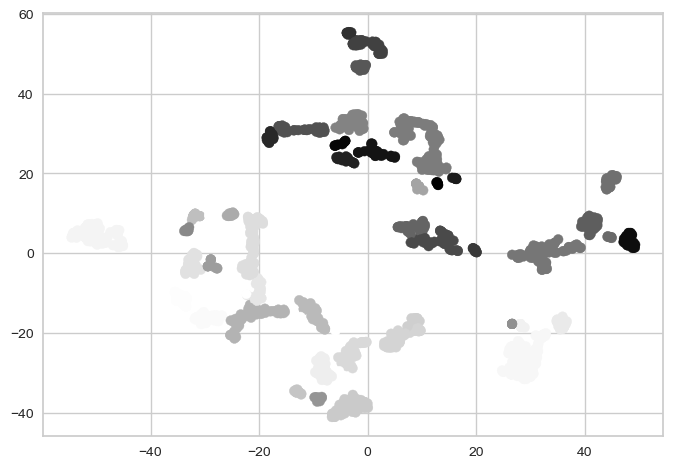

For eps = 2 we have:


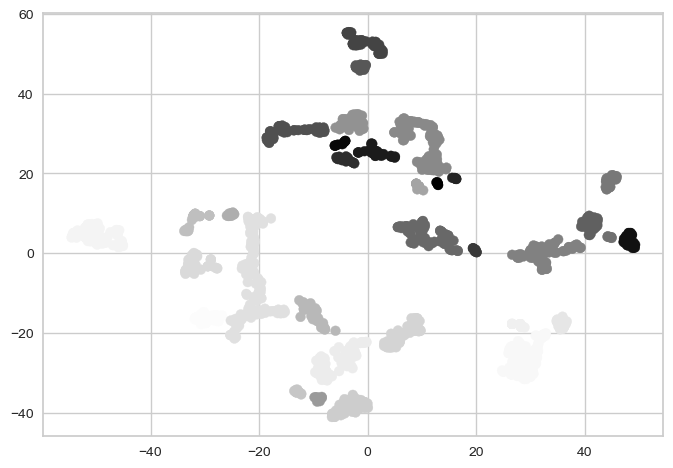

For eps = 3 we have:


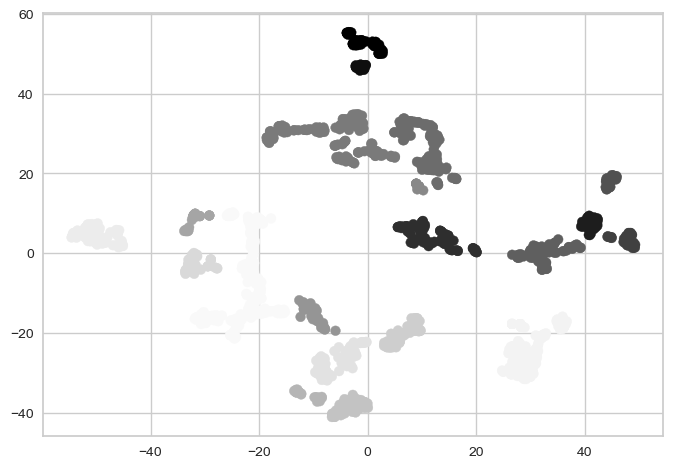

For eps = 5 we have:


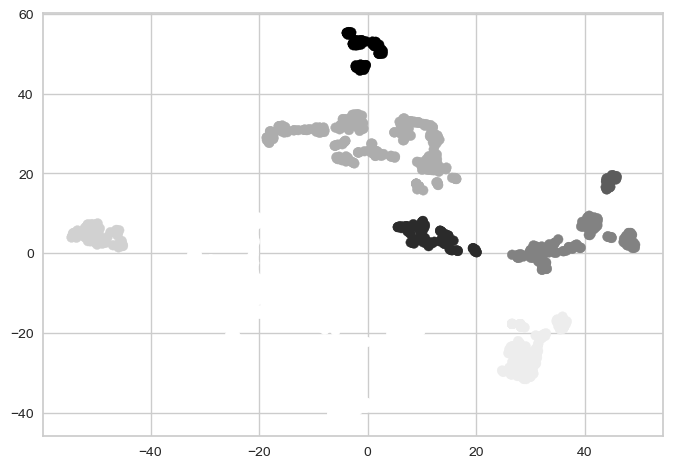

For eps = 10 we have:


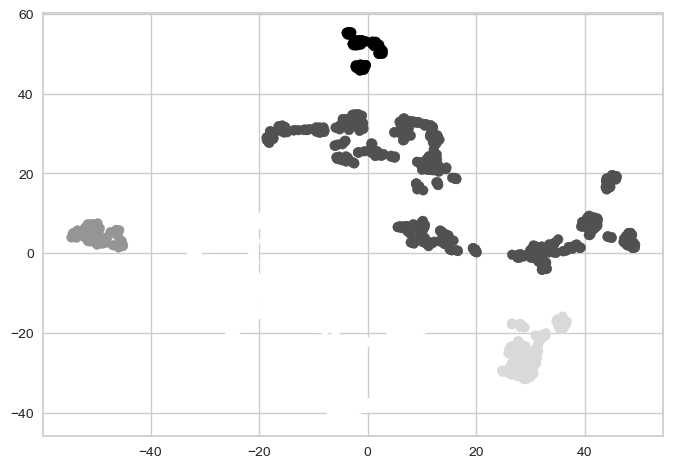

In [14]:
from sklearn.cluster import DBSCAN

eps_ = [0.1,0.5, 1.0,1.5, 2, 3, 5, 10]
for eps in eps_:
    db = DBSCAN(eps=eps, min_samples=4)
    label = db.fit_predict(X)
    print(f'For eps = {eps} we have:')
    plt.scatter(X['Feature 1'], X['Feature 2'], c=label)
    plt.show()

#### If we choose eps a small number we may affect of noise and when we choose a big number we may have few clusters. so choose a good eps is important.

# 10

In [15]:
X['dump'] = 1
X

,Feature 1,Feature 2,dump
0,-33.909115,-12.821243,1
1,-30.401861,-15.740746,1
2,27.565239,-30.825352,1
3,-48.602127,2.663689,1
4,28.082626,-17.812847,1
...,...,...,...
1367,7.920424,29.463884,1
1368,32.053898,-4.154735,1
1369,45.476128,19.348982,1
1370,48.091511,5.027816,1


In [16]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X.drop('dump',axis=1),X['dump'])
    dist, _ = knn.kneighbors()
    avg = dist.mean(axis=1)
    print(f'For K={k} we have {avg.mean()}')

For K=2 we have 0.3866029751792399
For K=3 we have 0.46994524642618285
For K=4 we have 0.5425408437445746
For K=5 we have 0.6105486463168266
For K=6 we have 0.6780316758172082
For K=7 we have 0.7464899990581483
For K=8 we have 0.8110212310072433
For K=9 we have 0.8739277017708721
For K=10 we have 0.9410472524031203
For K=11 we have 1.0119296792412489
For K=12 we have 1.084084826838843
For K=13 we have 1.155972273081685
For K=14 we have 1.2267029619294862
For K=15 we have 1.2948315371770738
For K=16 we have 1.3612056866778515
For K=17 we have 1.426000399056834
For K=18 we have 1.489570510792906
For K=19 we have 1.5516146847114731
